In [816]:
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2
%aimport bs_eda

In [817]:
import pandas as pd
import numpy as np
import bs_eda as beda

## Analyse formelle du dataset

In [818]:
df = pd.read_csv('all_brands.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 13631
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuel_type     99187 non-null  object 
 6   tax           99187 non-null  float64
 7   mpg           99187 non-null  float64
 8   engine_size   99187 non-null  float64
 9   brand         99187 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


#### Types

Les variables sont encodées selon 3 types de données:
  * valeur entière
  * valeur décimale
  * valeur discrète

In [819]:
df.dtypes.value_counts()

object     4
int64      3
float64    3
dtype: int64

Suggestion:
* Pour les variables `mileage` et `price`, convertir les `int64` en `float64`

#### Valeurs nulles

Il n'y a pas de valeurs nulles.


#### Doublons

In [820]:
print(f'Le dataset comprend {df.duplicated().sum()} doublons')

Le dataset comprend 1475 doublons


Suggestion:
* Supprimer les entrées redondantes.

## Analyse univariée

### Target `price`

#### Statistique `price`

In [821]:
df[target_var].describe()

count     99187.000000
mean      16805.347656
std        9866.773417
min         450.000000
25%        9999.000000
50%       14495.000000
75%       20870.000000
max      159999.000000
Name: price, dtype: float64

In [822]:
print(f"Le mode de '{target_var}' est {df[target_var].mode()[0]}")

Le mode de 'price' est 9995


#### Distribution `price`

In [823]:
target_var = 'price'

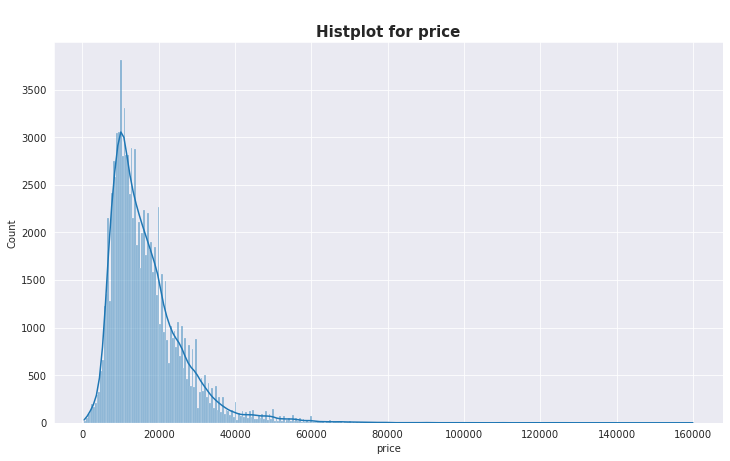

In [824]:
beda.get_histplot(df,target_var)

À Remarquer: 

* Distribution asymétrique à droite.
* Longue queue sur la droite représentant un certain nombre de voitures très chères.

Dans une distribution *asymétrique à droite*, la plupart des observations sont petites/moyennes, avec quelques observations beaucoup plus grandes que le reste.

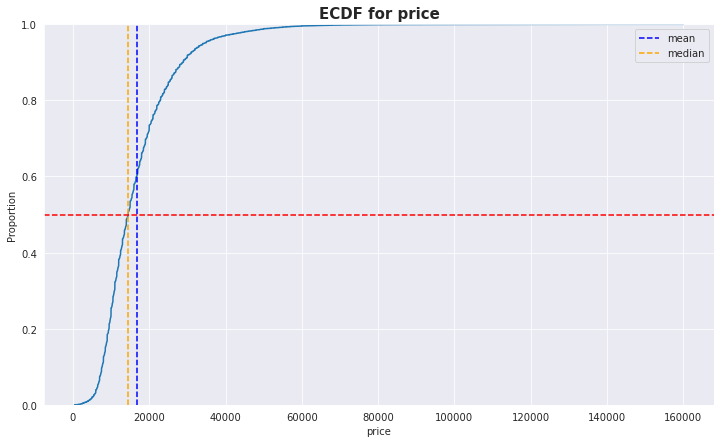

In [825]:
beda.get_ecdf(df,target_var)

À remarquer:
    
La moyenne (plus sensible aux *Outliers*) est supérieur à la médiane. 

Ce qui indique que des valeurs anormales influence la moyenne.

Lorsque la moyenne diffère de la médiane, la médiane constitue un meilleur indicateur du centre de la distribution.

#### Anomalies `price`

In [826]:
beda.get_occurence(data=df,feature='price',value=500,operator='<',show=True)
beda.get_occurence(data=df,feature='price',value=140000,operator='>',show=True)

Il y a 4 entrées ayant une valeur < à 500 pour la variable 'price'
Il y a 5 entrées ayant une valeur > à 140000 pour la variable 'price'


In [827]:
beda.get_suspected_outliers(data=df, feature='price', show=True)

Q1: 9999.0
Q3: 20870.0
IQR: 10871.0

Limite inférieur en-deça de laquelle une valeur est suspecte: -6307.5
Il y a 0 entrée ayant une valeur < à -6307.5 pour la variable 'price'

Limite supérieur au-delà de laquelle une valeur est suspecte: 37176.5
Il y a 3669 entrées ayant une valeur > à 37176.5 pour la variable 'price'


In [828]:
threshold = 60000
pct_under,pct_over = beda.get_repartition(df,target_var,threshold)
print(f"{pct_under}% des véhicules ont un prix inférieur à {threshold}£")
print(f"{pct_over}% des véhicules ont un prix supérieur à {threshold}£")

99.57% des véhicules ont un prix inférieur à 60000£
0.43% des véhicules ont un prix supérieur à 60000£


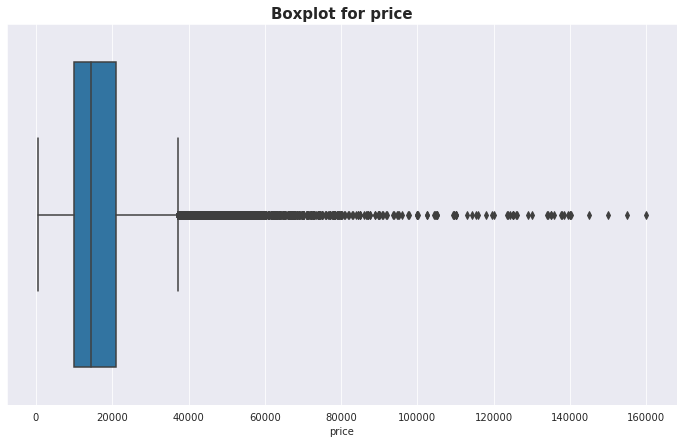

In [829]:
beda.get_boxplot(data=df,x=target_var, orient='h')

À remarquer:

* Énorme dispersion des valeurs de prix.

#### Suggestion `price`

* Vérifier la présence d'anomalies (Z-score)
```python
from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)
threshold = 3
print(np.where(zscore > 3))
df_clean=df
df_clean = df_clean[(zscore<2).all(axis=1)]
```
* Supprimer les valeurs extrêmes.
* Si nécessaire, après nettoyage la target `price` pourrait être normalisée en utilisant le `log` de la distribution.

### Variables continues 

#### Year
##### Statistique `year`

In [830]:
var = 'year'

In [831]:
df[var].describe()

count    99187.000000
mean      2017.087723
std          2.123934
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64

In [832]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'year' est 2019


##### Distribution `year`

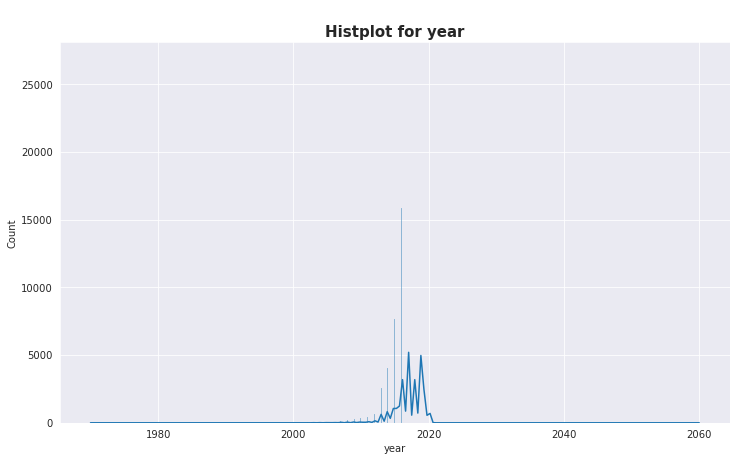

In [833]:
beda.get_histplot(df,var)

In [834]:
beda.get_occurence(data=df,feature=var, value=2021, operator='>', show=True)

Il y a 1 entrée ayant une valeur > à 2021 pour la variable 'year'


À remarquer:

* Valeurs au-delà de la date actuelle
* Le nombre de voiture datant d'avant 2010 devient négligeable 
* Près de 90% des voitures du dataset sont relativement récentes, max 5 ans.

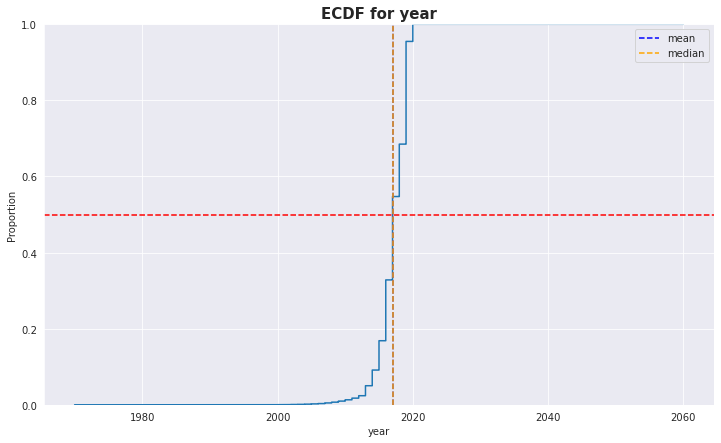

In [835]:
beda.get_ecdf(df,var)

À remarquer:
* Moyenne et médiane correspondent
* $\approx95\%$ des voitures ont une date $>2010$

##### Suggestions `year`
* Suppression des entrées dont l'année est exentrique
* Vérifier s'il convient de retirer les voitures avant une certaine date. 

#### Mileage

##### Statistique `mileage`

In [836]:
var = 'mileage'

In [837]:
df[var].describe()

count     99187.000000
mean      23058.914213
std       21148.523721
min           1.000000
25%        7425.000000
50%       17460.000000
75%       32339.000000
max      323000.000000
Name: mileage, dtype: float64

In [838]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'mileage' est 10


##### Distribution `mileage`

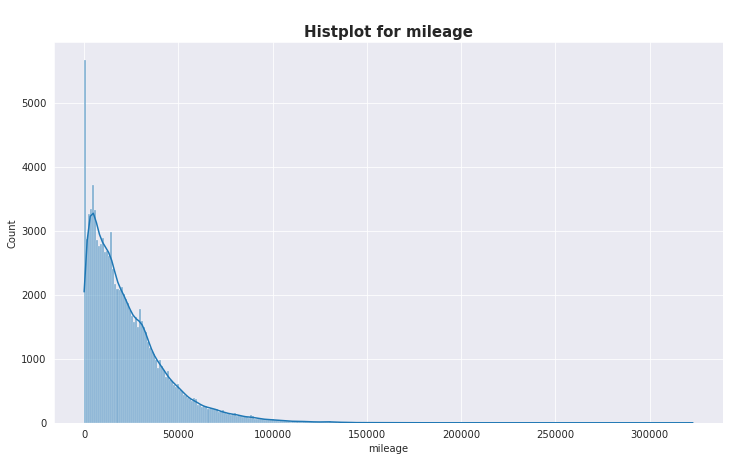

In [839]:
beda.get_histplot(df,var)

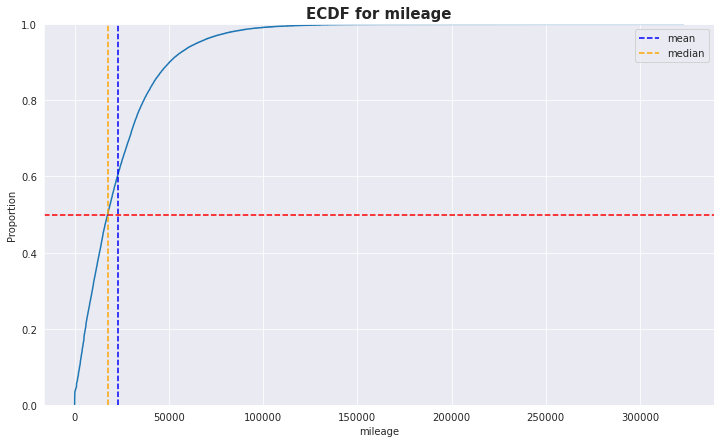

In [840]:
beda.get_ecdf(df,var)

À remarquer:
* Distribution asymétrique à droite.
* un pic suspect dans les valeurs basses.
* Les distances de la majorité des voitures du dataset sont plutôt faibles, $> 80\%$ ont moins de $50000$ miles (environ 80000 km).
* La moyenne est supérieur à la médiane. Quelques valeurs hautes influencent la distribution.

##### Anomalie `mileage`

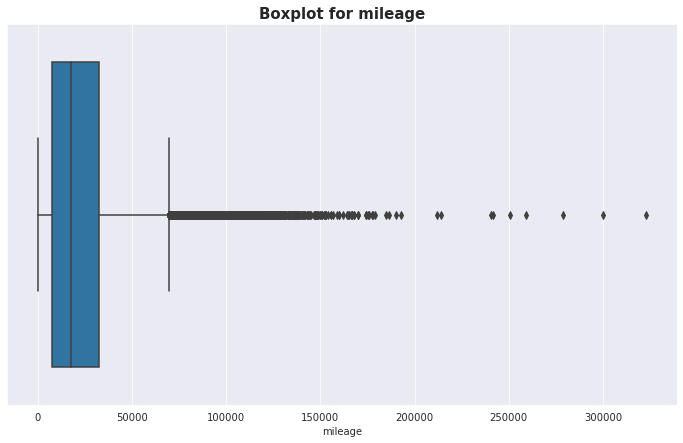

In [841]:
beda.get_boxplot(data=df,x=var, orient='h')

In [842]:
beda.get_suspected_outliers(data=df, feature=var, show=True)

Q1: 7425.0
Q3: 32339.0
IQR: 24914.0

Limite inférieur en-deça de laquelle une valeur est suspecte: -29946.0
Il y a 0 entrée ayant une valeur < à -29946.0 pour la variable 'mileage'

Limite supérieur au-delà de laquelle une valeur est suspecte: 69710.0
Il y a 3902 entrées ayant une valeur > à 69710.0 pour la variable 'mileage'


In [843]:
beda.get_occurence(data=df,feature=var, value=1, operator='=', show=True)
beda.get_occurence(data=df,feature=var, value=200000, operator='>', show=True)

Il y a 43 entrées ayant une valeur = à 1 pour la variable 'mileage'
Il y a 9 entrées ayant une valeur > à 200000 pour la variable 'mileage'


À remarquer:

* La distribution est désaxée.
* Une grande disparité des valeurs.
* Quelques véhicules ont parcouru des distances trop basses pour être réalistes.
* Quelques valeurs extrêmes au-delà de $200000$

##### Suggestions `mileage`

* Traiter la présence d'anomalies dans les valeurs hautes
* `mileage` très bas, mauvais d'encodage? suppression ou tentative correction?

#### Miles Per Galon
##### Statistique `mpg`

In [844]:
var = 'mpg'

In [845]:
df[var].describe()

count    99187.000000
mean        55.166825
std         16.138522
min          0.300000
25%         47.100000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64

In [846]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'mpg' est 60.1


##### Distribution `mpg`

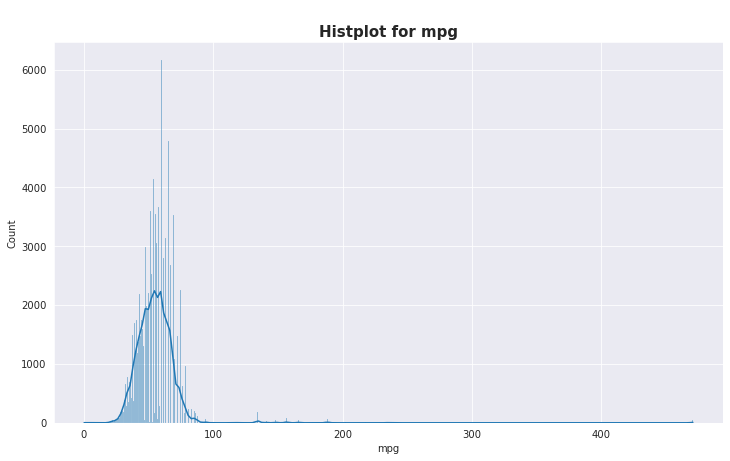

In [847]:
beda.get_histplot(df,var)

In [848]:
beda.get_occurence(data=df,feature=var, value=10, operator='<=', show=True)
beda.get_occurence(data=df,feature=var, value=140, operator='>=', show=True)

Il y a 34 entrées ayant une valeur <= à 10 pour la variable 'mpg'
Il y a 352 entrées ayant une valeur >= à 140 pour la variable 'mpg'


À remarquer:

* Distribution asymétrique à droite.
* Des valeurs suspectes sur le rendement `mpg`. 

   
  Plus la valeur de `mpg` est élevée, plus le véhicule est économique c'est-à-dire plus il peut parcourir de distance avec un certain volume de carburant.
  
  Les pires et meilleurs rendements pour 2021 sont respectivement de $10$ pour Bugatti/Lamborghini et $142$ pour Tesla selon le site [fueleconomy.gov](https://www.fueleconomy.gov/feg/best/bestworstnf.shtml)

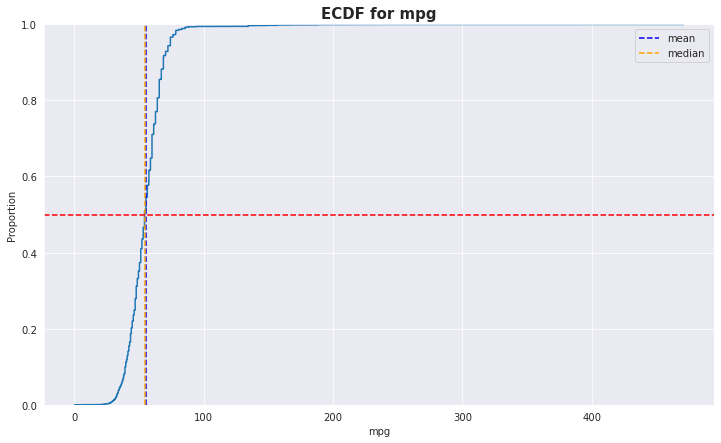

In [849]:
beda.get_ecdf(df,var)

À remarquer:
* Médiane et moyenne correspondent.
* La majorité des valeurs du `mpg` se situe entre $\approx25$ et $\approx80$

##### Anomalies `mpg`

In [850]:
beda.get_suspected_outliers(data=df, feature=var, show=True)

Q1: 47.1
Q3: 62.8
IQR: 15.699999999999996

Limite inférieur en-deça de laquelle une valeur est suspecte: 23.550000000000008
Il y a 187 entrées ayant une valeur < à 23.550000000000008 pour la variable 'mpg'

Limite supérieur au-delà de laquelle une valeur est suspecte: 86.35
Il y a 752 entrées ayant une valeur > à 86.35 pour la variable 'mpg'


##### Suggestions `mpg`

* Vérifier la validité des valeurs extrêmes, trop basses et trop hautes.
* Créer une échelle discrète de rendement: bas, moyen, haut
```python
def fuel_economy(mpg):
    average = (36,47)
    if mpg<average[0]: 
        result = "Low"
    if (mpg>average[0] and mpg<average[1]): 
        result = "Medium"
    if mpg>average[1]: 
        result = "High"
    return result
```
```python
df["fuel_economy"]=df.apply(lambda x: fuel_economy(x["mpg"]),axis=1)
sns.countplot(data=df,x="fuel_economy")
```

#### Engine Size
##### Statistique `engine_size`

In [851]:
var = 'engine_size'

In [852]:
df[var].describe()

count    99187.000000
mean         1.663280
std          0.557646
min          0.000000
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engine_size, dtype: float64

In [853]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'engine_size' est 2.0


##### Distribution `engine_size`

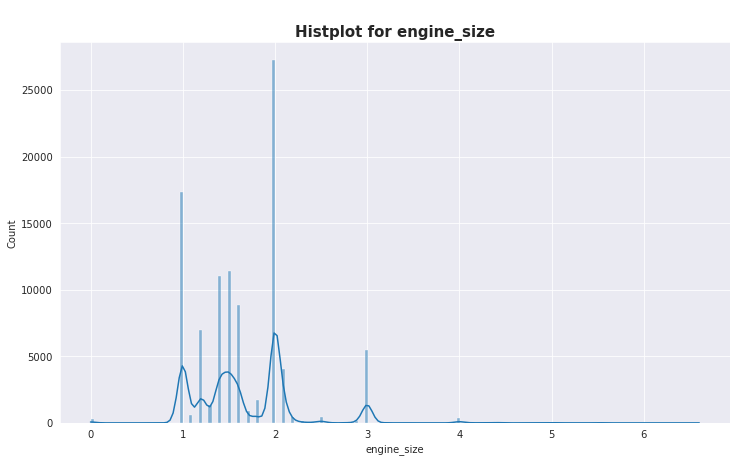

In [854]:
beda.get_histplot(df,var)

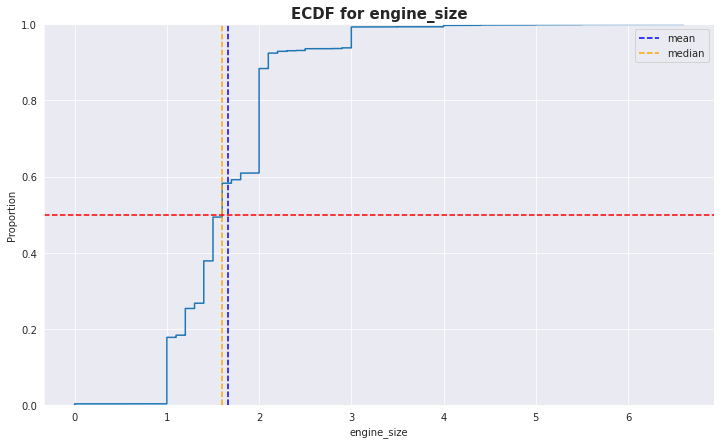

In [855]:
beda.get_ecdf(df,var)

In [856]:
beda.get_occurence(data=df,feature=var, value=0, operator='=', show=True)
beda.get_occurence(data=df,feature=var, value=6, operator='>', show=True)

Il y a 273 entrées ayant une valeur = à 0 pour la variable 'engine_size'
Il y a 16 entrées ayant une valeur > à 6 pour la variable 'engine_size'


À remarquer

* Distribution asymétrique à droite.
* Quelques valeurs hautes influencent la distribution
* La plus grande part 90% des voitures ont un `engine size` de 2 ou moins.
* Un nombre de voiture ont un moteur de taille 0

##### Anomalies `engine_size`

In [857]:
beda.get_suspected_outliers(data=df, feature=var, show=True)

Q1: 1.2
Q3: 2.0
IQR: 0.8

Limite inférieur en-deça de laquelle une valeur est suspecte: -2.220446049250313e-16
Il y a 0 entrée ayant une valeur < à -2.220446049250313e-16 pour la variable 'engine_size'

Limite supérieur au-delà de laquelle une valeur est suspecte: 3.2
Il y a 650 entrées ayant une valeur > à 3.2 pour la variable 'engine_size'


##### Notes sur Engine Size

* *Small Engine Size*: 
  * de 1 litre à 1,9 litre 
  * Ils sont généralement les plus économiques car ils consomment moins de carburant. 
  * Cela se traduit souvent par une puissance moindre par rapport à un moteur plus gros. 
* *Large Engine Size*:
  * 2,0 litres et plus
  * Plus puissants, mais consomment plus de carburant.

##### Suggestion `engine_size`

* Corriger ou supprimer les valeurs 0
* traiter les valeurs de 6
* Créer une échelle discrète de taille de moteur: small, large
* Utiliser un OrdinalEncoder?

#### Tax
##### Statistique `tax`

In [858]:
var = 'tax'

In [859]:
df[var].describe()

count    99187.000000
mean       120.299838
std         63.150926
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

In [860]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'tax' est 145.0


##### Distribution `tax`

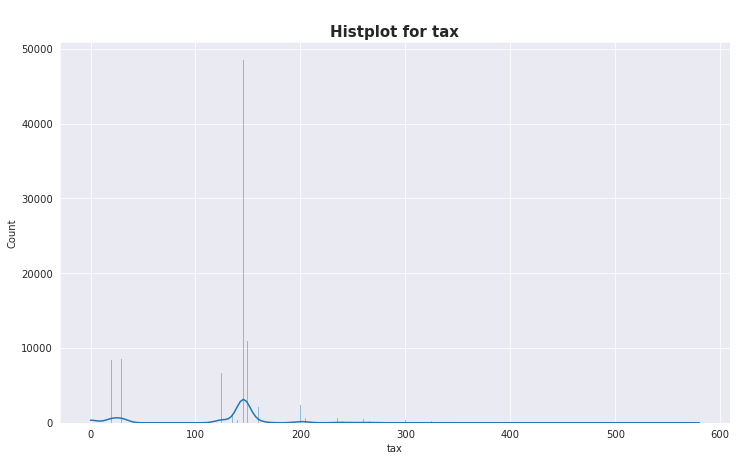

In [861]:
beda.get_histplot(df,var)

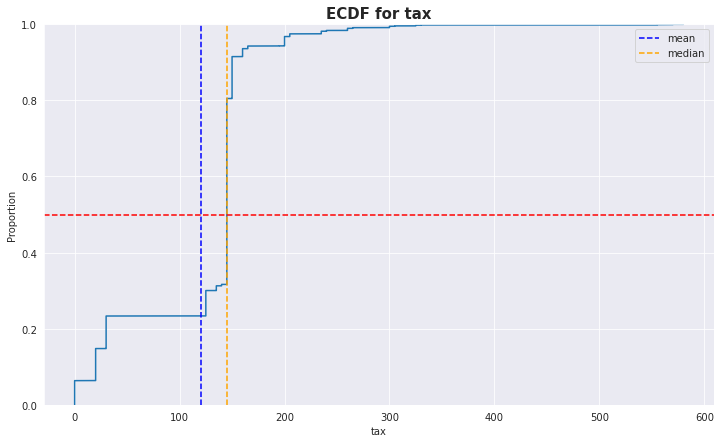

In [862]:
beda.get_ecdf(df,var)

In [863]:
beda.get_occurence(data=df,feature=var, value=0, operator='=', show=True)
beda.get_occurence(data=df,feature=var, value=300, operator='>', show=True)

Il y a 6294 entrées ayant une valeur = à 0 pour la variable 'tax'
Il y a 520 entrées ayant une valeur > à 300 pour la variable 'tax'


À remarquer

* Distribution asymétrique à droite.
* 2 pics, l'un autour des 25-30, l'autre près des 150.
* Quelques valeurs hautes et un très grand nombre de voitures pour lesquelles la tax vaut 0.

##### Anomalies `tax`

In [864]:
beda.get_suspected_outliers(data=df, feature=var, show=True)

Q1: 125.0
Q3: 145.0
IQR: 20.0

Limite inférieur en-deça de laquelle une valeur est suspecte: 95.0
Il y a 23144 entrées ayant une valeur < à 95.0 pour la variable 'tax'

Limite supérieur au-delà de laquelle une valeur est suspecte: 175.0
Il y a 5671 entrées ayant une valeur > à 175.0 pour la variable 'tax'


##### Suggestion `tax`

* Les données apparaissent difficilement fiables, la feature pourrait être supprimée.

### Variables Discrètes

In [865]:
df.describe(include='object')

,model,transmission,fuel_type,brand
count,99187,99187,99187,99187
unique,195,4,5,9
top,Fiesta,Manual,Petrol,ford
freq,6557,56445,54928,17965


##### Suggestion variables discrètes

Encoder les features. LabelEncoder et/ou OneHotEncoder?

#### Model

Les valeurs de `model` sont préfixées d'un espace blanc.

À assainir.

##### Statistique `model`

In [866]:
var = 'model'

In [867]:
df[var].describe()

count      99187
unique       195
top       Fiesta
freq        6557
Name: model, dtype: object

In [868]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'model' est Fiesta


In [869]:
print(f"{df[var].nunique()} {var}(s) uniques encodés")

195 model(s) uniques encodés


In [870]:
df_brand_model = df.value_counts(subset=['brand','model'],ascending=False,normalize=True)
df_brand_model = df_brand_model.reset_index()
df_brand_model.columns=['brand','model','model count']

n=10
print(f'les {n} models les plus présents:')
df_brand_model.head(n)

les 10 models les plus présents:


,brand,model,model count
0,ford,Fiesta,0.066107
1,vw,Golf,0.049029
2,ford,Focus,0.046256
3,mercedes,C Class,0.037777
4,opel,Corsa,0.034692
5,vw,Polo,0.033139
6,opel,Astra,0.028280
7,mercedes,A Class,0.025820
8,bmw,3 Series,0.024630
9,ford,Kuga,0.022432


In [871]:
limit = 0.0001
beda.get_occurence(data=df_brand_model,feature='model count', value=limit, operator='<', show=True)
#print(f'\nLes {n} models les moins représentés:')
#df_brand_model[df_brand_model['model count']<limit]

Il y a 36 entrées ayant une valeur < à 0.0001 pour la variable 'model count'


##### Distribution de ` model` par marque

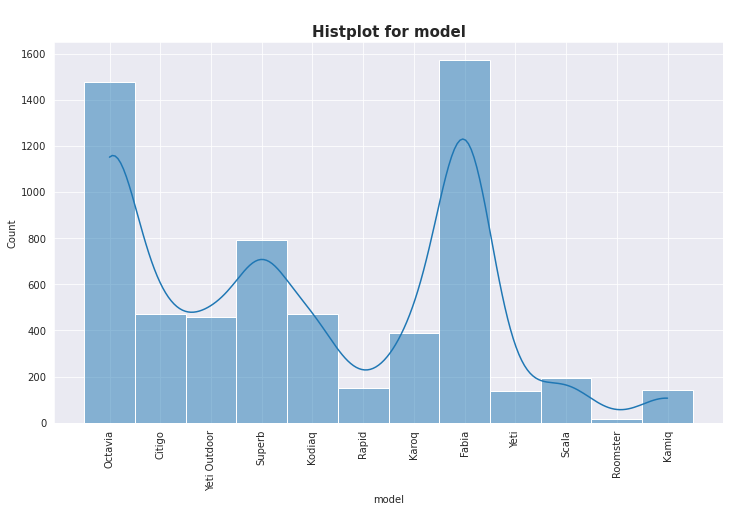

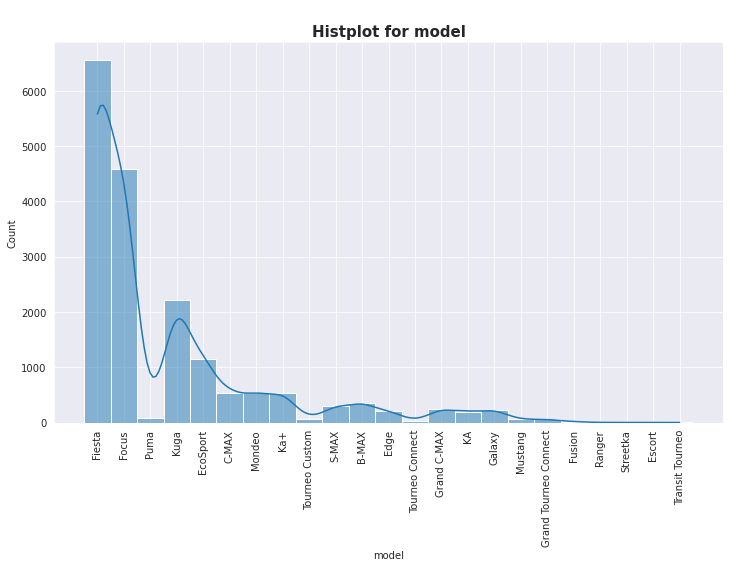

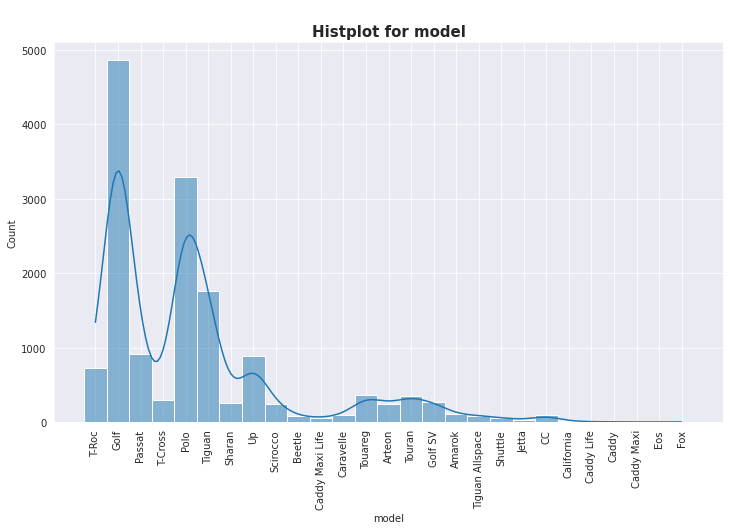

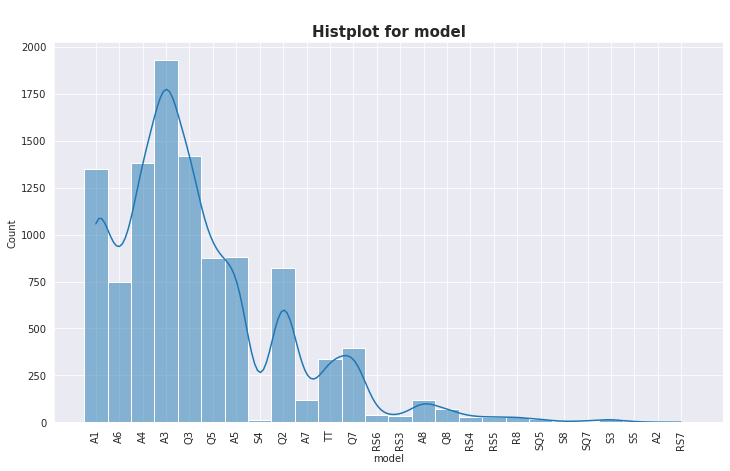

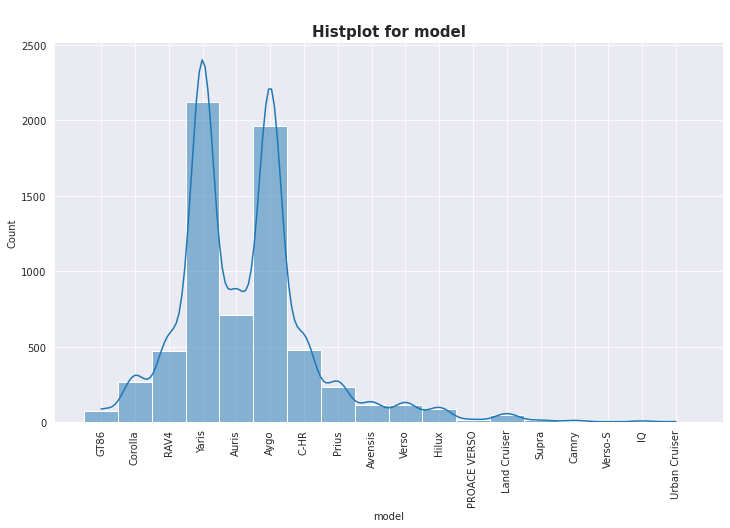

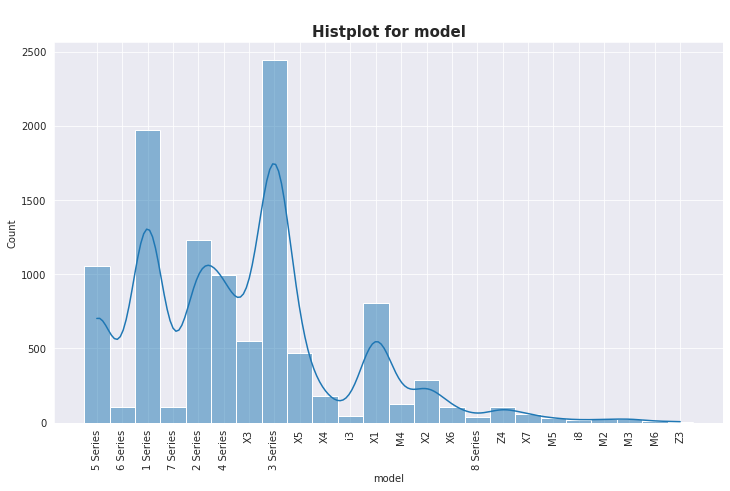

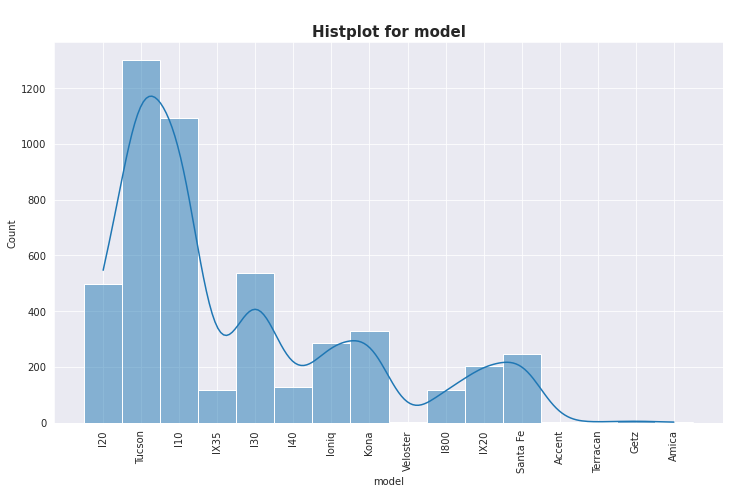

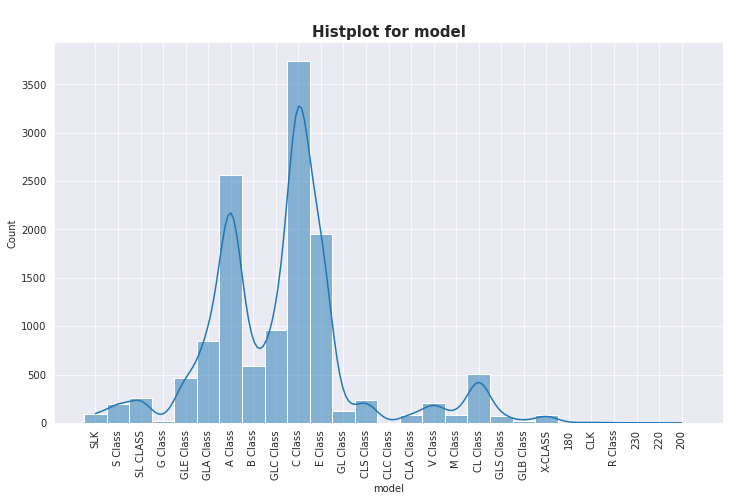

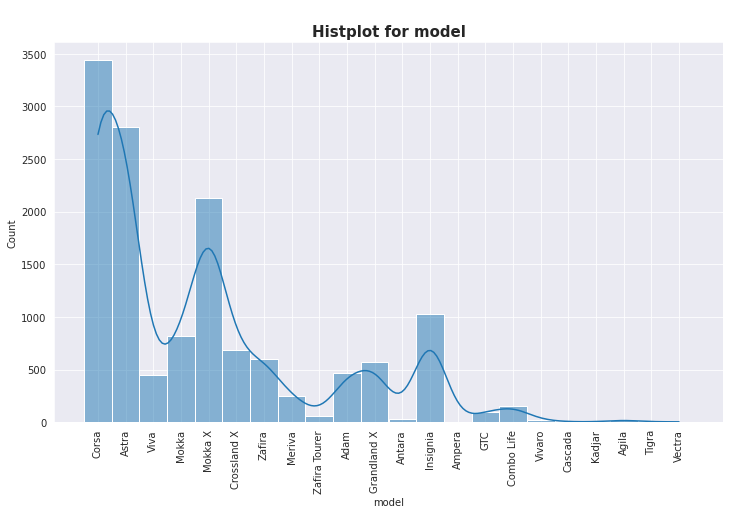

In [872]:
for brand in df['brand'].unique():
    beda.get_histplot(data=df[df['brand'] == brand], column="model", rotation=90)

#### Transmission
##### Statistique `transmission`

In [873]:
var = 'transmission'

In [874]:
print(f"{df[var].nunique()} {var} uniques encodés:\n{df[var].unique()}")

4 transmission uniques encodés:
['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [875]:
df[var].describe()

count      99187
unique         4
top       Manual
freq       56445
Name: transmission, dtype: object

In [876]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'transmission' est Manual


##### Distribution `transmission`

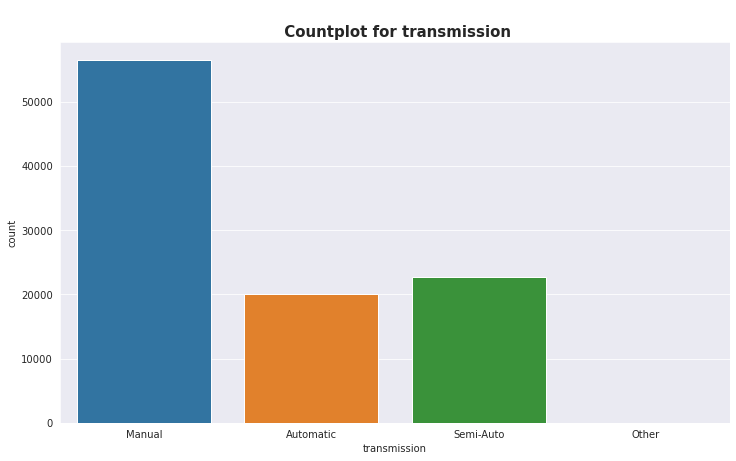

Manual       0.569077
Semi-Auto    0.228629
Automatic    0.202204
Other        0.000091
Name: transmission, dtype: float64


In [877]:
beda.get_countplot(df,var)

In [878]:
beda.get_occurence(data=df,feature=var,value='Other',show=True)

Il y a 9 entrées ayant une valeur = à Other pour la variable 'transmission'


À remarquer:

* Le nombre d'entrées pour la valeur `Other` est négligeable

##### Suggestion `transmission`

* Supprimer les entrées pour lesquelles le mode de transmission est `Other`

#### Fuel Type

In [879]:
var = 'fuel_type'

In [880]:
print(f"{df[var].nunique()} {var} uniques encodés:\n{df[var].unique()}")

5 fuel_type uniques encodés:
['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


##### Statistique `fuel_type`

In [881]:
df[var].describe()

count      99187
unique         5
top       Petrol
freq       54928
Name: fuel_type, dtype: object

In [882]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'fuel_type' est Petrol


##### Distribution `fuel_type`

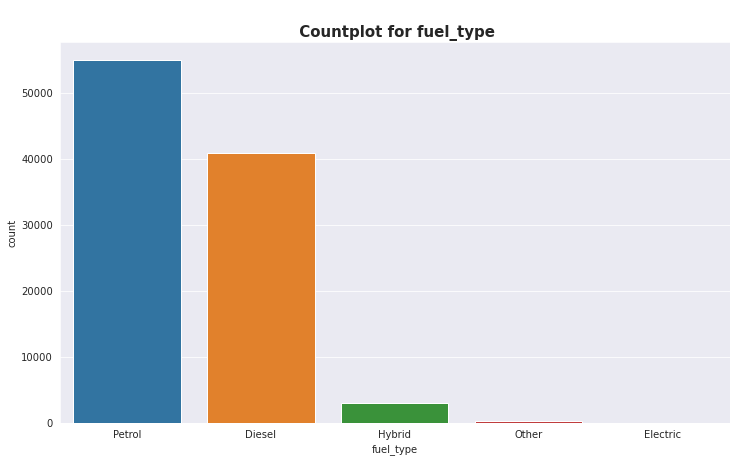

Petrol      0.553782
Diesel      0.412635
Hybrid      0.031032
Other       0.002490
Electric    0.000060
Name: fuel_type, dtype: float64


In [883]:
beda.get_countplot(df,var)

À remarquer:

* Nombre de type `other`et `electric` est négligeable.

##### Suggestions `fuel_type`

* Fusionner ou supprimer les catégories de `fuel_type` qui ne sont pas représentatives

## Analyse Multivariée

### Variables Continues vs Target

#### Year vs Price

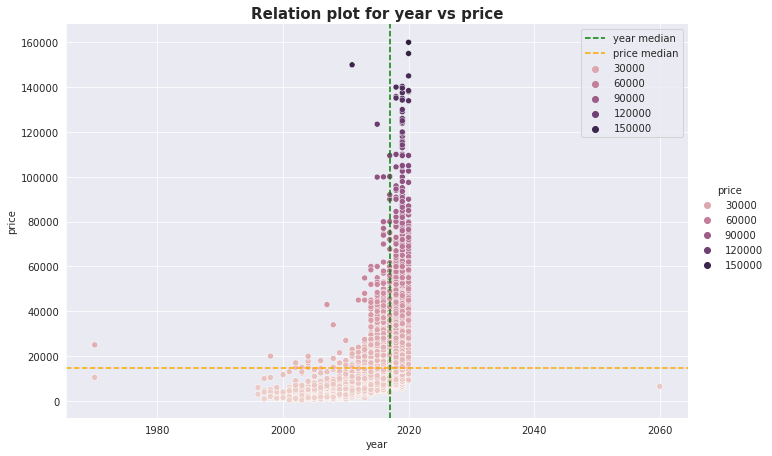

Avg year: 2017.0877231895308
Avg price: 16805.347656446913


In [884]:
var = 'year'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:

* Plus la date est récente (grande) plus le prix augmente
* Quelques voitures surévaluées par rapport à leur date, peut-être dû à d'autres features du véhicule.


#### Mileage vs Price

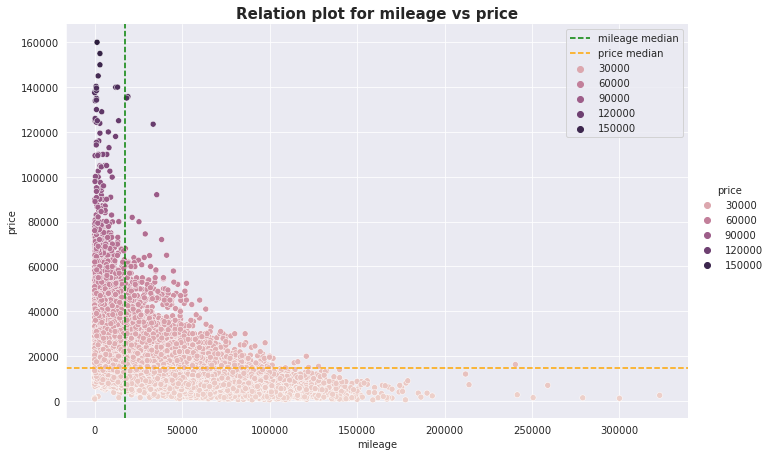

Avg mileage: 23058.914212548014
Avg price: 16805.347656446913


In [885]:
var = 'mileage'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Plus le `mileage` augmente plus le prix baisse
* Une valeur extrème de `mileage` à $>300000$

#### Tax vs Price

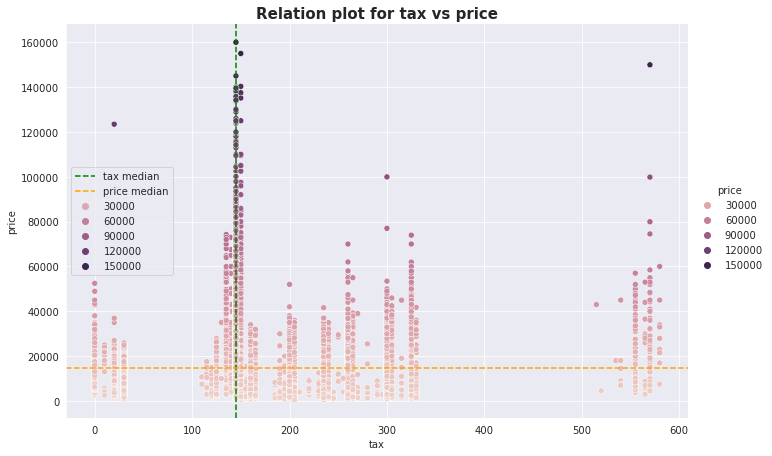

Avg tax: 120.29983768034117
Avg price: 16805.347656446913


In [886]:
var = 'tax'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Pas de corrélations visuellement flagrandes
* 3 bandes, approximativement:
  1. $0<n<50$
  1. $100<n<350$
  1. $500<n<600$
* On retrouve tous les prix des véhicules pour des taxes entre $100<n<350$£ 
* En comparaison, on remarque une plus grande disparité de prix de véhicules dans $500<n<600$£

Suggestions:
* Créer des bandes pour réduire le bruit

#### Miles Per Galon vs Price

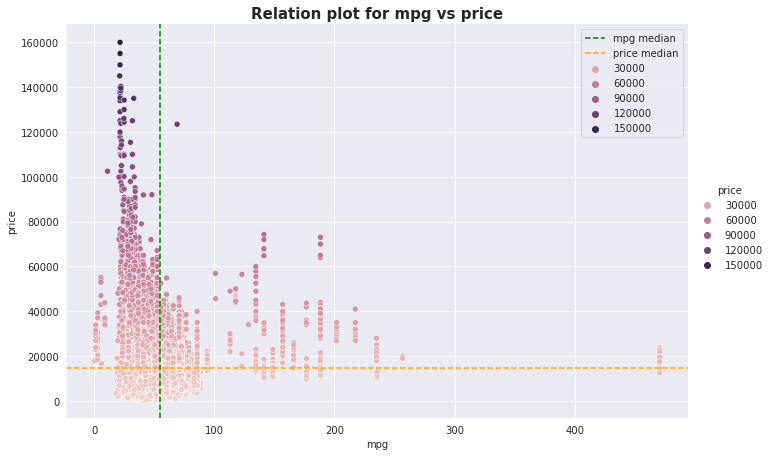

Avg mpg: 55.16682549124948
Avg price: 16805.347656446913


In [887]:
var = 'mpg'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Quelques valeurs pour `mpg`$>100$ avec des prix sans tendance marquée
* En faisant abstraction des valeurs extrêmes, on aperçoit une corrélation négative

Suggestions:
* Investiguer sur la fiabilité des valeurs extrèmes de `mpg`

#### Engine Size vs Price

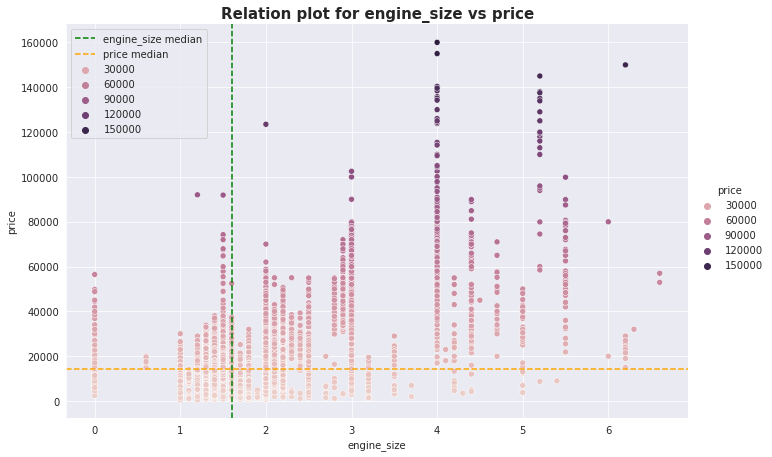

Avg engine_size: 1.6632804702231219
Avg price: 16805.347656446913


In [888]:
var = 'engine_size'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Les moteurs plus gros montent plus haut dans les prix
* Quelques valeurs de prix isolées
* Taille de moteur à zéro?

Suggestions:
* Vérifier la pertinence des valeurs isolées

### Variables Discrètes vs Target

#### Model vs Price [TODO$

In [889]:
var = 'model'

In [890]:
def outliers_count_by_model(data):
    all_suspect_count = 0
    print("Nombre de valeurs suspectes par modèle:")
    for m in brand_data['model'].unique():
        low_outlier, high_outlier= beda.get_suspected_outliers(data=brand_data[brand_data['model']==m], feature=target_var)
        model_suspect_count = low_outlier.count() + high_outlier.count()
        if(model_suspect_count>0):
            print(f"{m}: {model_suspect_count}")
        all_suspect_count+=model_suspect_count
    print(f"total: {all_suspect_count}")

##### Skoda

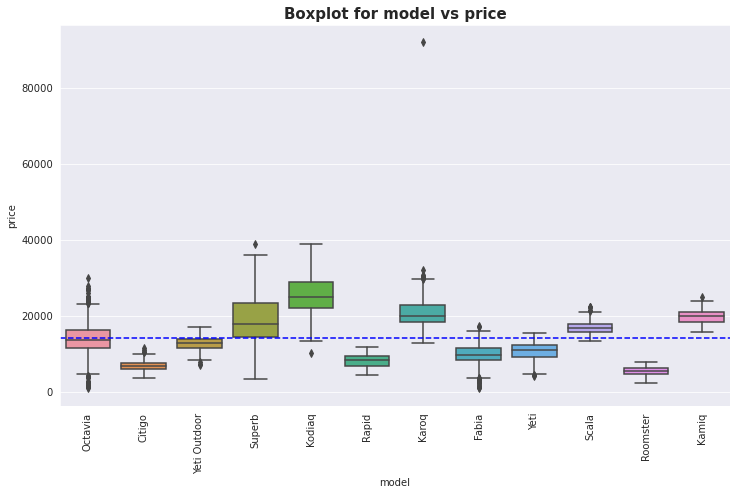

Avg price: 14275.449337801181


In [891]:
brand = 'skoda'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [892]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Octavia: 45
Citigo: 4
Yeti Outdoor: 3
Superb: 1
Kodiaq: 1
Karoq: 9
Fabia: 21
Yeti: 3
Scala: 5
Kamiq: 1
total: 93


À remarquer:

Suggestions:

##### Ford

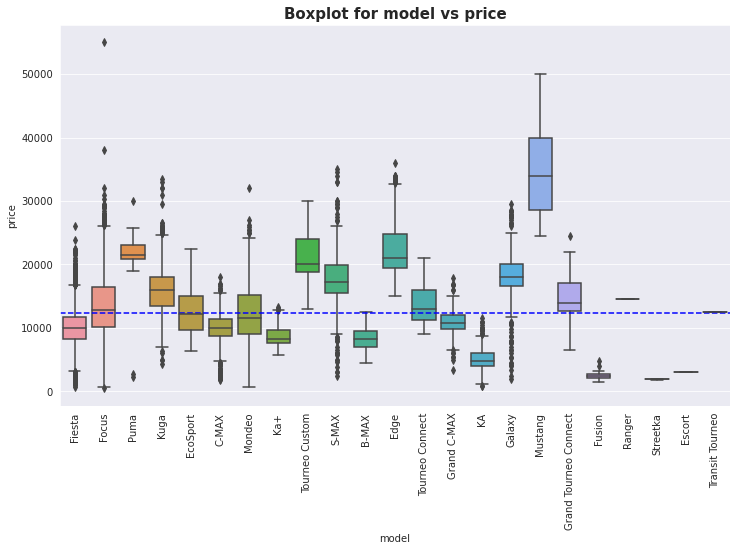

Avg price: 12279.756415251879


In [893]:
brand = 'ford'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [894]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Fiesta: 198
Focus: 42
Puma: 3
Kuga: 31
C-MAX: 30
Mondeo: 8
Ka+: 5
S-MAX: 33
Edge: 14
Grand C-MAX: 13
KA: 18
Galaxy: 42
Grand Tourneo Connect: 1
Fusion: 2
total: 440


À remarquer:

Suggestions:

##### Mercedes

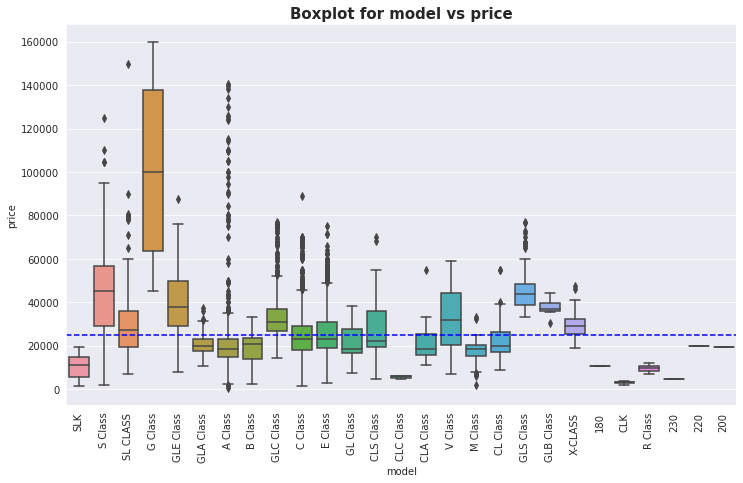

Avg price: 24698.596920496988


In [895]:
brand = 'mercedes'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [896]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
S Class: 4
SL CLASS: 11
GLE Class: 1
GLA Class: 5
A Class: 58
GLC Class: 36
C Class: 69
E Class: 51
CLS Class: 2
CLA Class: 1
M Class: 7
CL Class: 3
GLS Class: 11
GLB Class: 1
X-CLASS: 2
total: 262


À remarquer:

Suggestions:

##### Volkswagen

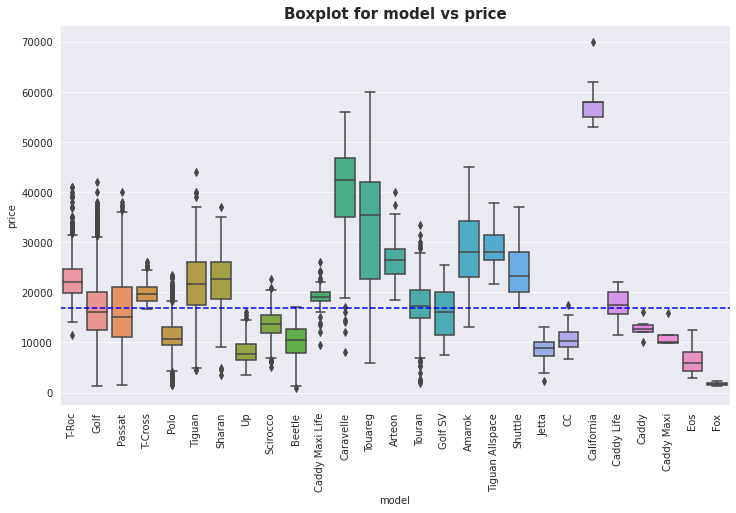

Avg price: 16838.952365243782


In [897]:
brand = 'vw'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [898]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
T-Roc: 55
Golf: 82
Passat: 5
T-Cross: 6
Polo: 136
Tiguan: 6
Sharan: 4
Up: 3
Scirocco: 10
Beetle: 1
Caddy Maxi Life: 11
Caravelle: 6
Arteon: 2
Touran: 17
Jetta: 1
CC: 1
California: 1
Caddy: 2
Caddy Maxi: 1
total: 350


À remarquer:

Suggestions:

##### Audi

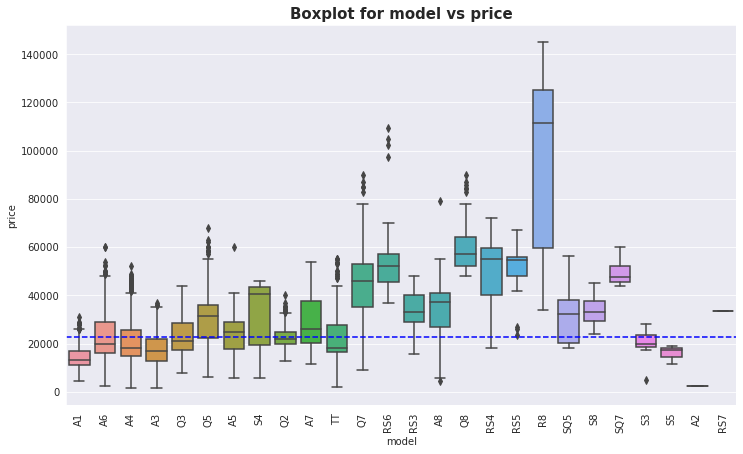

Avg price: 22896.685039370077


In [899]:
brand = 'audi'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [900]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
A1: 12
A6: 10
A4: 45
A3: 3
Q5: 10
A5: 1
Q2: 10
TT: 13
Q7: 5
RS6: 4
A8: 2
Q8: 6
RS5: 3
S3: 1
total: 125


À remarquer:

Suggestions:

##### Toyota

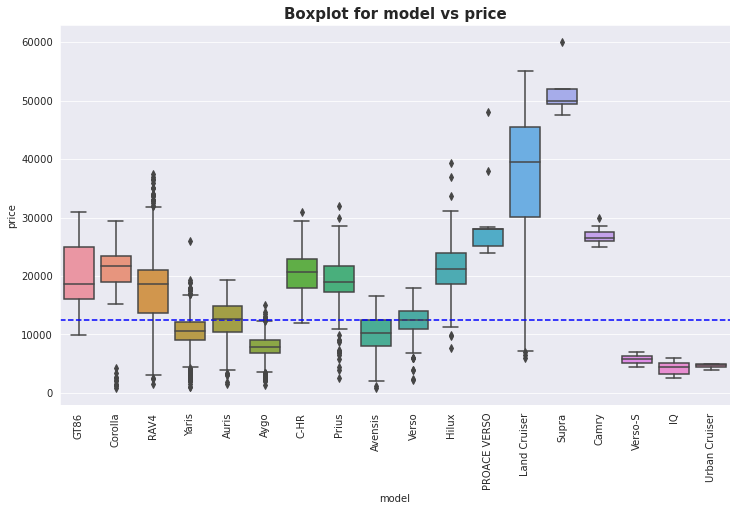

Avg price: 12522.3910655981


In [901]:
brand = 'toyota'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [902]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Corolla: 10
RAV4: 25
Yaris: 59
Auris: 6
Aygo: 31
C-HR: 1
Prius: 16
Avensis: 2
Verso: 8
Hilux: 6
PROACE VERSO: 2
Land Cruiser: 3
Supra: 1
Camry: 1
total: 171


À remarquer:

Suggestions:

##### BMW

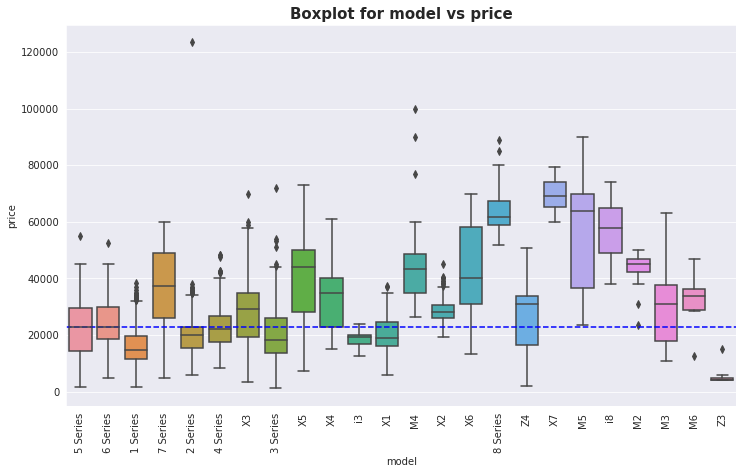

Avg price: 22733.408867452


In [903]:
brand = 'bmw'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [904]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
5 Series: 1
6 Series: 1
1 Series: 20
2 Series: 12
4 Series: 7
X3: 3
3 Series: 6
X1: 2
M4: 3
X2: 9
8 Series: 2
M2: 2
M6: 1
Z3: 1
total: 70


À remarquer:

Suggestions:

##### Hyundai

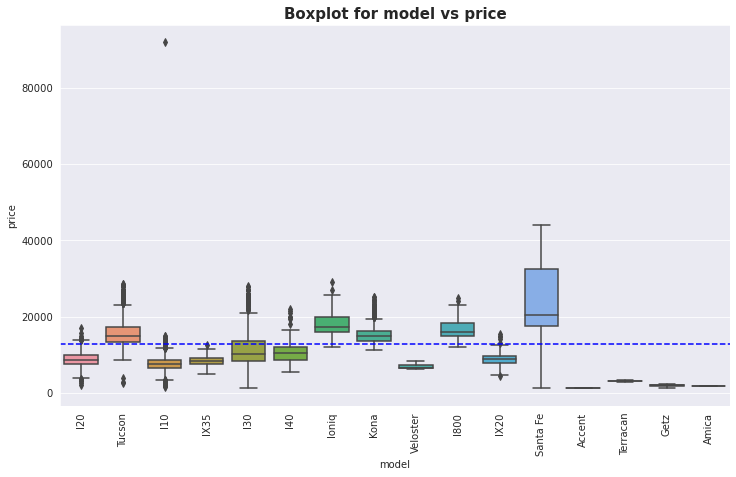

Avg price: 12750.131069958848


In [905]:
brand = 'hyundai'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [906]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
I20: 16
Tucson: 85
I10: 70
IX35: 1
I30: 52
I40: 7
Ioniq: 2
Kona: 49
I800: 2
IX20: 6
total: 290


À remarquer:

Suggestions:

##### Opel

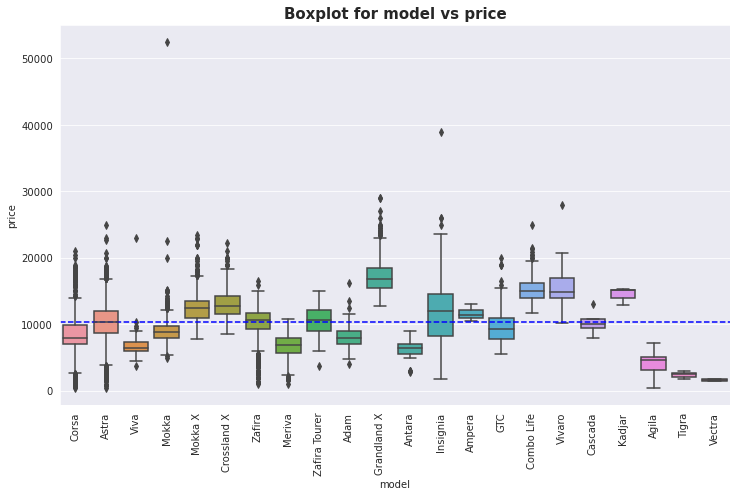

Avg price: 10406.457893192488


In [907]:
brand = 'opel'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data,x=var,y=target_var, rotation=90)

In [908]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Corsa: 142
Astra: 102
Viva: 5
Mokka: 42
Mokka X: 34
Crossland X: 13
Zafira: 58
Meriva: 9
Zafira Tourer: 1
Adam: 4
Grandland X: 21
Antara: 4
Insignia: 4
GTC: 6
Combo Life: 8
Vivaro: 1
Cascada: 1
total: 455


À remarquer:

* Prix extrêmes sur certains modèles: Mokka et Insignia

Suggestions:


#### Transmission vs Price

In [909]:
var = 'transmission'

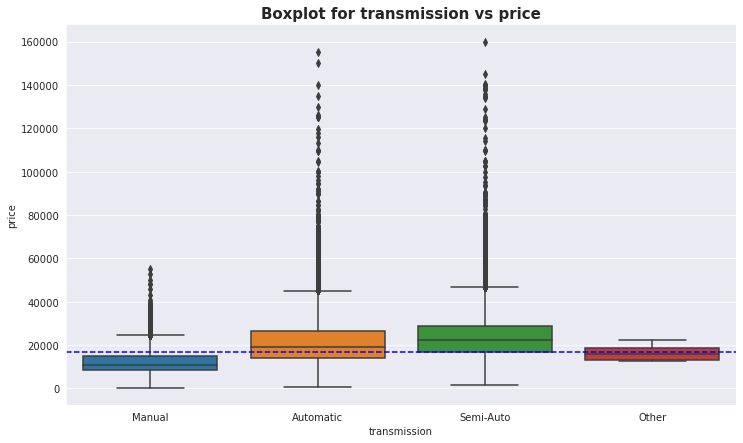

Avg price: 16805.347656446913


In [910]:
beda.get_boxplot(data = df,x=var,y=target_var)

#### Fuel Type vs Price

In [911]:
var = 'fuel_type'

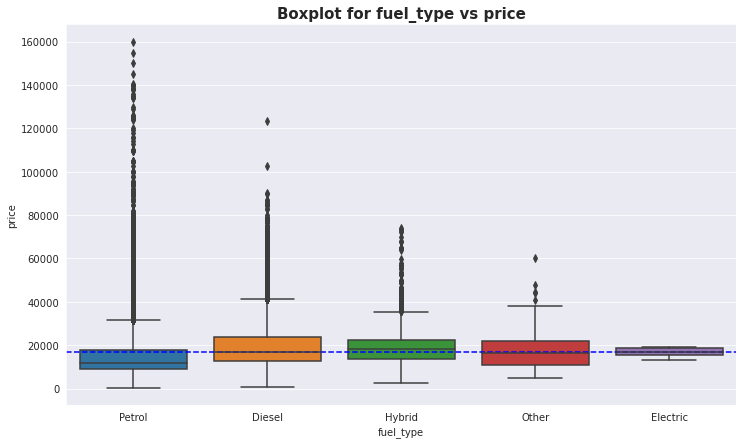

Avg price: 16805.347656446913


In [912]:
beda.get_boxplot(data=df,x = var,y = target_var)

## Statistiques

### Corrélations

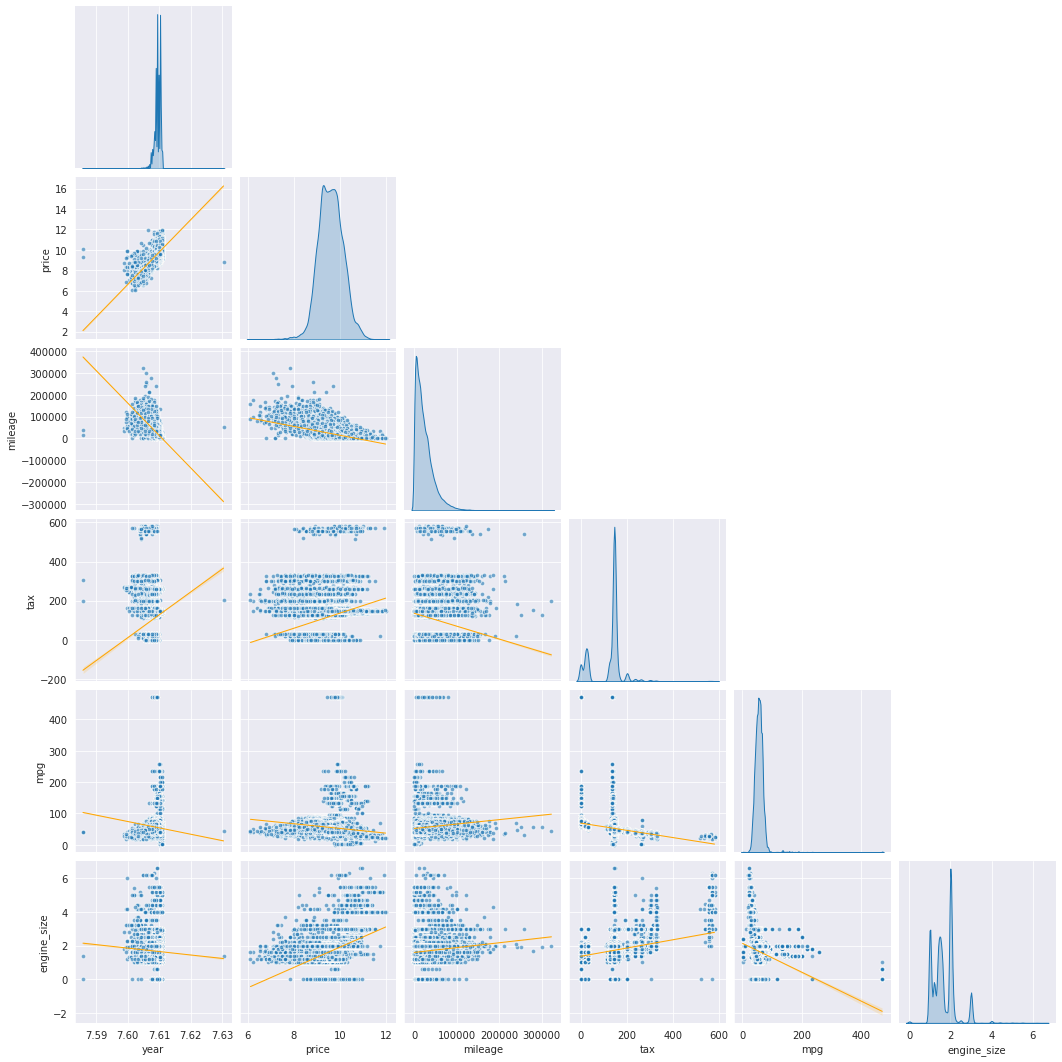

In [913]:
beda.get_pairplot(df, log=['year', 'price'])

Les corrélations les plus facilement observables sont:
* `price` et `year`
* `mileage` et `year`
* `mileage` et `price` (sans doute par transitivité)

On peut supposer une légère corrélation entre `tax` et `engine size` ou encore entre `tax` et `mpg`

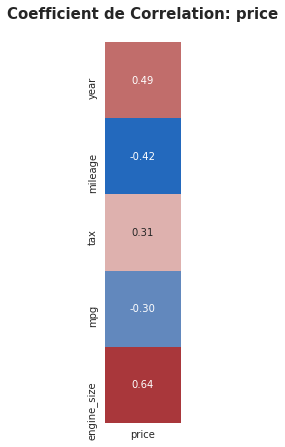

In [914]:
beda.get_correlation(df, target = 'price')

##### Observations des corrélations avec la target `price`

Corrélation positive par ordre décroissant:

1. `price` et `year` sont positivement corrélés.
    Les voiture plus récentes sont plus chères
1. `price` et `engine_size` sont positivement corrélés. Les voitures avec une taille de moteur plus importante sont plus chères.
1. `price` et `tax` plutôt positivement corrélés. C'est peut-être un effet de bord de la corrélation entre `mpg` et `tax`

Corrélation négative par ordre croissant:

1. `price` et `mileage` sont négativement corrélés.
    Plus les distances parcourues par la voiture sont grandes moins chère sera le prix de revente
1. `price` et `mpg` sont négativement corrélés. On pourrait penser que les voitures avec un meilleur rendement se vendraient plus chères, cette corrélation négative pourrait se justifier par le fait que les moteurs plus gros sont plus cher, ont une consommation plus grande et un rendement plus bas.


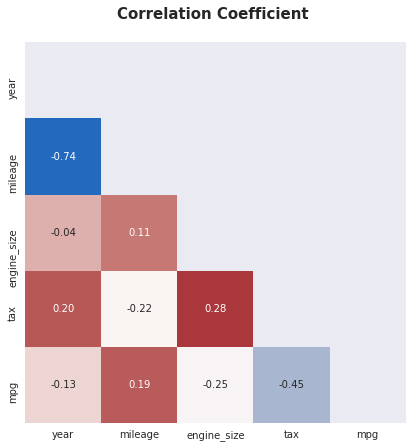

In [915]:
beda.get_correlation(df, fields = ['year','mileage','engine_size','tax', 'mpg'])

##### Observations des corrélations entre features

Il n'y a pas d'interdépendances positives franches entre les différentes features.

Les corrélations positives remarquables sont, par ordre décroissant:

1. `mpg` et `mileage` sont positivement corrélés.
1. `tax` et `engine_size` sont positivement corrélés.

Les corrélations négatives remarquables par ordre croissant:

1. `mileage` et `year` sont négativement corrélés. Ce qui fait sens, à moins de n'avoir jamais utilisé sa voiture, plus l'année est ancienne (petite), plus le nombre de miles parcouru est grand.
1. `mpg` et `tax` sont négativement corrélés. La corrélation peut être renforcée par des effets indirects. Si on postule qu'un moteur plus grand consomme plus par miles parcouru et que la taxe augmente avec la taille du moteur, on peut penser que plus le rendement est grand, moins la taxe est élevée. 
1. `mpg` et `engine_size` sont négativement corrélés.
1. `mpg` et `year` sont négativement corrélés.

### Faible corrélation

#### `mileage` vs `engine_size`

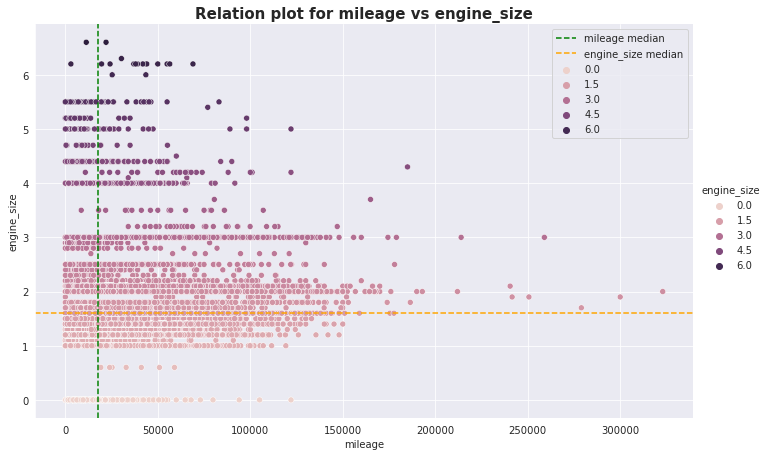

Avg mileage: 23058.914212548014
Avg engine_size: 1.6632804702231219


In [916]:
beda.get_relplot(data=df, x='mileage', y='engine_size',x_trace=['median'], y_trace=['median'])

#### `tax` vs `year`

In [917]:
var_a = 'tax'
var_b = 'year'

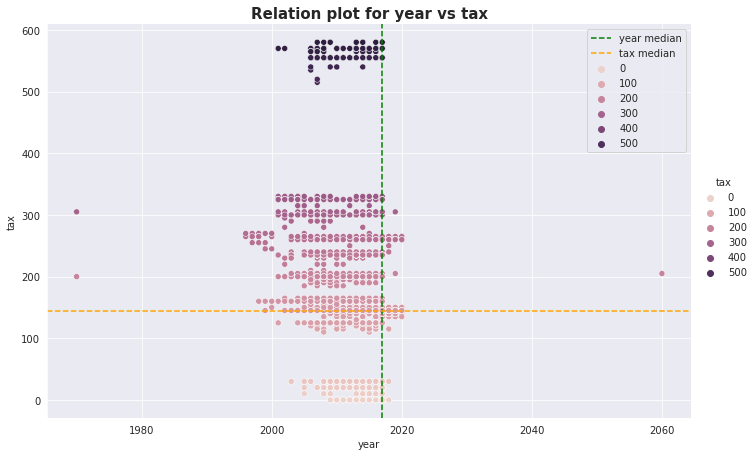

Avg year: 2017.0877231895308
Avg tax: 120.29983768034117


In [918]:
beda.get_relplot(data=df, x=var_b, y=var_a,x_trace=['median'], y_trace=['median'])

### Corrélation positive

#### `mileage` vs `mpg`

In [919]:
var_a = 'mileage'
var_b = 'mpg'

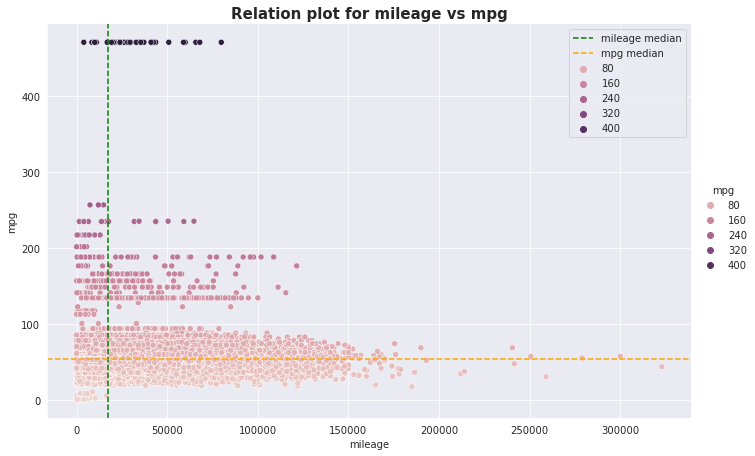

Avg mileage: 23058.914212548014
Avg mpg: 55.16682549124948


In [920]:
beda.get_relplot(data=df, x=var_a, y=var_b, x_trace=['median'], y_trace=['median'])

#### `tax` vs `engine_size`

In [921]:
var_a = 'tax'
var_b = 'engine_size'

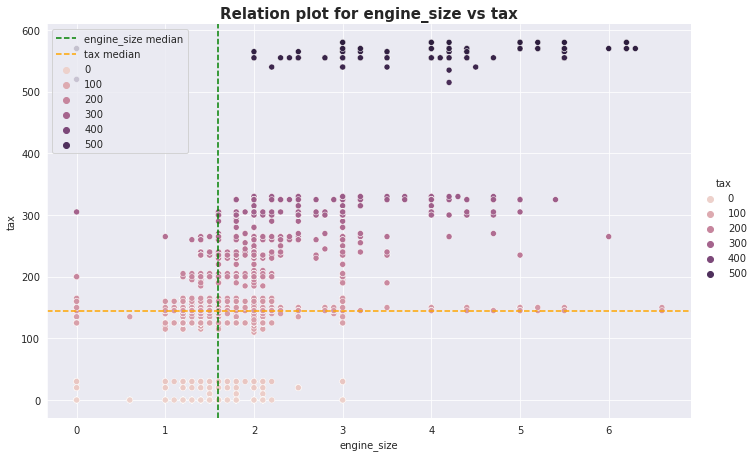

Avg engine_size: 1.6632804702231219
Avg tax: 120.29983768034117


In [922]:
beda.get_relplot(data=df, x=var_b, y=var_a,x_trace=['median'], y_trace=['median'])